In [151]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [129]:
# 1. Loading the Financial Dataset
fin_data = pd.read_csv("compustat_2000_clean.csv", na_values = ["NA", "na", "?"], low_memory = False)
fin_data = fin_data.dropna(axis=1)
fin_data.shape

(235996, 301)

In [314]:
# Define the selected 10 variables
selected_columns = ["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"]

# Slice the DataFrame to include only these columns
fin_data_selected = fin_data[selected_columns]

# Display the first few rows
print(fin_data_selected.head())

        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga  
0  96.077  
1  85.037  
2  78.845  
3  81.165  
4  87.902  


In [320]:
X = fin_data_selected  # Feature matrix
y = fin_data["ggroup"]  # Target vector
feature_names = fin_data_selected.columns
gics_mapping = {
    2010.0: "Capital Goods",
    2030.0: "Transportation",
    4520.0: "Technology Hardware & Equipment",
    2020.0: "Commercial & Professional Services",
    3510.0: "Health Care Equipment & Services",
    3520.0: "Pharmaceuticals, Biotechnology & Life Sciences",
    2540.0: "Media & Entertainment",
    1010.0: "Energy",
    4020.0: "Diversified Financials",
    5510.0: "Utilities",
    5020.0: "Media",
    4030.0: "Insurance",
    2550.0: "Retailing",
    2520.0: "Consumer Durables & Apparel",
    4510.0: "Software & Services",
    4530.0: "Semiconductors & Semiconductor Equipment",
    5010.0: "Telecommunication Services",
    1510.0: "Materials",
    3030.0: "Household & Personal Products",
    3010.0: "Food & Staples Retailing",
    6010.0: "Equity Real Estate Investment Trusts (REITs)",
    3020.0: "Food, Beverage & Tobacco",
    2510.0: "Automobiles & Components",
    2530.0: "Consumer Services",
    6020.0: "Real Estate Management & Development",
    4010.0: "Banks",
    4040.0: "Real Estate"
}

In [326]:
# Convert to a pandas DataFrame for easier handling
nb_data = pd.DataFrame(X, columns=["at", "ni", "revt", "ceq", "epspx", "capx", "oibdp", "wcap", "dltt", "xsga"])
nb_data['Industry'] = y
nb_data['Industry'] = nb_data['Industry'].map(gics_mapping)

In [328]:
print("First five rows of the dataset:")
print(nb_data.head())

First five rows of the dataset:
        at      ni     revt      ceq  epspx    capx   oibdp     wcap     dltt  \
0  701.854  18.531  874.255  340.212   0.69  13.134  64.367  360.464  179.987   
1  710.199 -58.939  638.721  310.235  -2.08  12.112  27.207  286.192  217.699   
2  686.621 -12.410  606.337  294.988  -0.39   9.930  30.745  192.837  164.658   
3  709.292   3.504  651.958  301.684   0.11  10.286  47.491  300.943  248.666   
4  732.230  15.453  747.848  314.744   0.58  13.033  61.774  314.517  227.159   

     xsga       Industry  
0  96.077  Capital Goods  
1  85.037  Capital Goods  
2  78.845  Capital Goods  
3  81.165  Capital Goods  
4  87.902  Capital Goods  


In [330]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [332]:
# Initialize the Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [334]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm.shape


Confusion Matrix:
[[   36     0     0  1445     1    77     0     0     0     0     3     0
      3     5    15     0     1     0   231     1     3   124     3    30
    116    25   349]
 [    3     0     6  1346     0    23     0     0     0     0     1     0
     32     0    26     0     0     0   235     0     1   103     2    73
     63     2   300]
 [    7     0     2  1503     1    31     0     0     0     0     5     0
     53     3    32     4     1     0   380     0     7    60     0    55
     45    11   441]
 [    0     0     1   779     0     1     0     0     1     0     0     0
     22     3    11     0     0     0   266     0     2    13     0     8
     11     0   126]
 [    9     0     4   372     2     6     0     0     0     0     0     0
     17     0     8     0     1     0    76     0     2    34     3    38
     57     3    77]
 [    1     1     0   224     0    37     0     0     0     0     5     0
     18     1     8     0     0     0    63     0     5    21 

(27, 27)

In [336]:
print("\nClassification Report:")
cr = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)
print(cr)

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


Classification Report:
                                                precision    recall  f1-score   support

                                 Capital Goods       0.50      0.01      0.03      2468
                                Transportation       0.00      0.00      0.00      2216
               Technology Hardware & Equipment       0.04      0.00      0.00      2641
            Commercial & Professional Services       0.04      0.63      0.08      1244
              Health Care Equipment & Services       0.50      0.00      0.01       709
Pharmaceuticals, Biotechnology & Life Sciences       0.08      0.08      0.08       449
                         Media & Entertainment       1.00      0.00      0.00      1109
                                        Energy       0.00      0.00      0.00      1329
                        Diversified Financials       0.50      0.00      0.00       413
                                     Utilities       1.00      0.00      0.00      1213
       

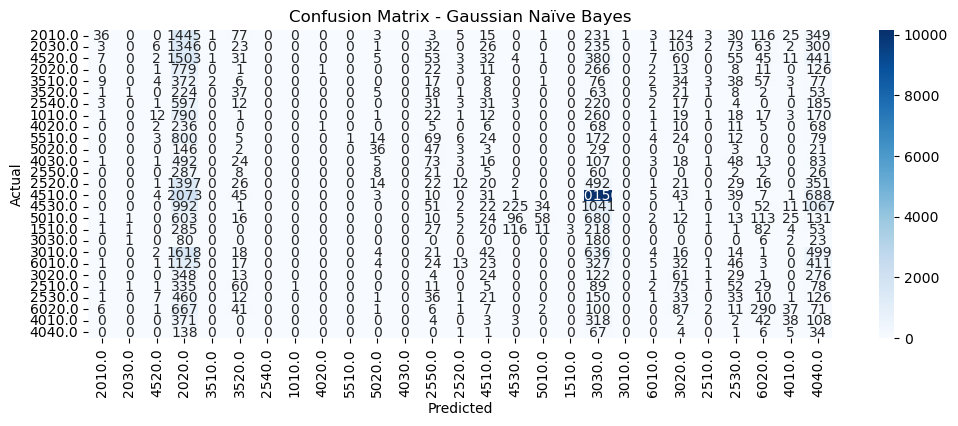

In [346]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(12,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gics_mapping,
            yticklabels=gics_mapping)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Gaussian Naïve Bayes')
plt.show()